# 비만 요소들

## 3-1. 문제 정의 및 가설 수립
* 가족 구성원 중 비만이 있는 사람들이 그렇지 않은 사람들보다 비만일 확률이 높을것이다.
* 비만인 사람들의 물, 채소 섭취량은 낮을 것이다.
* 전자기기 사용 시간이 길수록, 운동량이 적고, 비만일 확률이 높을 것이다.
    * (운동량이 적으면 비만일 확률이 높을 것이다)
* 추가가설: 흡연, 음주와 비만의 관계

## 3-2. 데이터 가져오기

In [1]:
# !kaggle datasets download -d ankurbajaj9/obesity-levels

In [2]:
# !mkdir obesity_data

In [3]:
# !tar -xvf obesity-levels.zip -C obesity_data

## 3-3. 데이터 로드하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 데이터를 불러온다.
df = pd.read_csv('obesity_data/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 3-4. 데이터 살펴보기

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.shape

(2111, 17)

In [8]:
# 컬럼들을 한글로 변환
df.columns = ['성별', '나이', '키', '몸무게', '비만인 가족', '고칼로리 섭취', '채소 섭취', '식사', '간식', '흡연', '물', '칼로리 확인', '운동', '전자기기', '음주', '이동수단', '비만']
df.head()

,성별,나이,키,몸무게,비만인 가족,고칼로리 섭취,채소 섭취,식사,간식,흡연,물,칼로리 확인,운동,전자기기,음주,이동수단,비만
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
# 필요없는 칼로리 확인, 식사, 간식 컬럼 제거
df.drop(['칼로리 확인', '식사', '간식'], axis=1, inplace=True)
df.head()

,성별,나이,키,몸무게,비만인 가족,고칼로리 섭취,채소 섭취,흡연,물,운동,전자기기,음주,이동수단,비만
0,Female,21.0,1.62,64.0,yes,no,2.0,no,2.0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,yes,3.0,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,no,2.0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,no,2.0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,no,2.0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
# 비만 간소화
df.loc[df['비만'].str.contains('Insuff'), '비만'] = '저체중'
df.loc[df['비만'].str.contains('Normal'), '비만'] = '정상'
df.loc[df['비만'].str.contains('Over'), '비만'] = '과체중'
df.loc[df['비만'].str.contains('Obesity'), '비만'] = '비만'
df.head(20)

,성별,나이,키,몸무게,비만인 가족,고칼로리 섭취,채소 섭취,흡연,물,운동,전자기기,음주,이동수단,비만
0,Female,21.0,1.62,64.0,yes,no,2.0,no,2.0,0.0,1.0,no,Public_Transportation,정상
1,Female,21.0,1.52,56.0,yes,no,3.0,yes,3.0,3.0,0.0,Sometimes,Public_Transportation,정상
2,Male,23.0,1.80,77.0,yes,no,2.0,no,2.0,2.0,1.0,Frequently,Public_Transportation,정상
3,Male,27.0,1.80,87.0,no,no,3.0,no,2.0,2.0,0.0,Frequently,Walking,과체중
4,Male,22.0,1.78,89.8,no,no,2.0,no,2.0,0.0,0.0,Sometimes,Public_Transportation,과체중
5,Male,29.0,1.62,53.0,no,yes,2.0,no,2.0,0.0,0.0,Sometimes,Automobile,정상
6,Female,23.0,1.50,55.0,yes,yes,3.0,no,2.0,1.0,0.0,Sometimes,Motorbike,정상
7,Male,22.0,1.64,53.0,no,no,2.0,no,2.0,3.0,0.0,Sometimes,Public_Transportation,정상
8,Male,24.0,1.78,64.0,yes,yes,3.0,no,2.0,1.0,1.0,Frequently,Public_Transportation,정상
9,Male,22.0,1.72,68.0,yes,yes,2.0,no,2.0,1.0,1.0,no,Public_Transportation,정상


In [11]:
df['비만'].value_counts()

비만     972
과체중    580
정상     287
저체중    272
Name: 비만, dtype: int64

In [12]:
df[df['전자기기'] == 1]

,성별,나이,키,몸무게,비만인 가족,고칼로리 섭취,채소 섭취,흡연,물,운동,전자기기,음주,이동수단,비만
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,no,2.000000,0.000000,1.0,no,Public_Transportation,정상
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,no,2.000000,2.000000,1.0,Frequently,Public_Transportation,정상
8,Male,24.000000,1.780000,64.000000,yes,yes,3.0,no,2.000000,1.000000,1.0,Frequently,Public_Transportation,정상
9,Male,22.000000,1.720000,68.000000,yes,yes,2.0,no,2.000000,1.000000,1.0,no,Public_Transportation,정상
11,Female,21.000000,1.720000,80.000000,yes,yes,2.0,no,2.000000,2.000000,1.0,Sometimes,Public_Transportation,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,Female,25.999185,1.568543,102.000122,yes,yes,3.0,no,1.000544,0.001297,1.0,Sometimes,Public_Transportation,비만
1919,Female,25.930376,1.608808,102.083964,yes,yes,3.0,no,1.019684,0.026033,1.0,Sometimes,Public_Transportation,비만
1967,Female,25.957740,1.624140,102.233445,yes,yes,3.0,no,1.067716,0.030541,1.0,Sometimes,Public_Transportation,비만
1968,Female,25.909353,1.644078,102.277765,yes,yes,3.0,no,1.029241,0.075776,1.0,Sometimes,Public_Transportation,비만


## 3-5. EDA

### 1. 가족구성원-비만

In [13]:
# 가족중 비만이 있는 사람 vs 없는 사람
yd = df[df['비만인 가족'] == 'yes']
nd = df[df['비만인 가족'] == 'no']
yd.shape, nd.shape

((1726, 14), (385, 14))

* 가족 구성원 중 비만이 있는 사람 : 1726
* 가족 구성원 중 비만이 없는 사람 : 385

In [14]:
# 각각의 데이터에서의 비만 정도
yd['비만'].value_counts(), nd['비만'].value_counts()

(비만     964
 과체중    481
 정상     155
 저체중    126
 Name: 비만, dtype: int64,
 저체중    146
 정상     132
 과체중     99
 비만       8
 Name: 비만, dtype: int64)

In [15]:
# 비만인 사람의 비율 계산
964 / 1726, 8 / 385

(0.5585168018539977, 0.02077922077922078)

[]

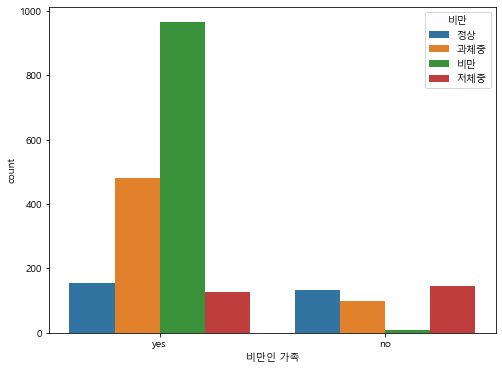

In [16]:
# 각 데이터마다 비만, 과체중, 정상, 저체중인 사람 수 그래프로 나타냄.
plt.figure(figsize=(8, 6))
sns.countplot(x='비만인 가족', hue='비만', data=df)
plt.plot()

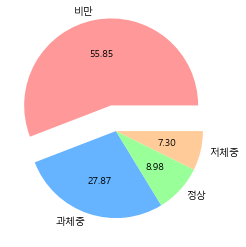

In [32]:
# 위 데이터를 백분율로 표기하여 pie 차트로 나타냄.
label1 = ['비만', '과체중', '정상', '저체중']
explode1 = [0.3, 0, 0, 0]
color1 = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(yd['비만'].value_counts(), labels=label1, explode=explode1, colors=color1, autopct='%.2f')
# plt.savefig('image1-1.png') - 시각화된 그래프를 저장하기 위함.
plt.show()

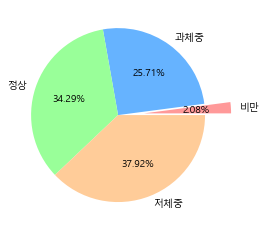

In [33]:
plt.pie(nd['비만'].value_counts()[::-1], labels=label1, explode=explode1, colors=color1, autopct='%.2f%%')
# plt.savefig('image1-2.png')
plt.show()

가족 구성원 중 비만이 있는 사람들이 그렇지 않은 사람들보다 비만일 확률이 높다는 가설은 성립한다.

### 2. 물, 채소 - 비만

In [19]:
# 비만을 기준으로 그룹화하여, 물 섭취와 채소 섭취의 평균을 데이터 프레임으로 만듦.
df2 = df.groupby('비만')[['물', '채소 섭취']].mean()
df2 = df2.reindex(index=['비만', '과체중', '정상', '저체중']).reset_index()
df2

,비만,물,채소 섭취
0,비만,2.072639,2.520077
1,과체중,2.041929,2.262605
2,정상,1.850174,2.334495
3,저체중,1.871281,2.480788


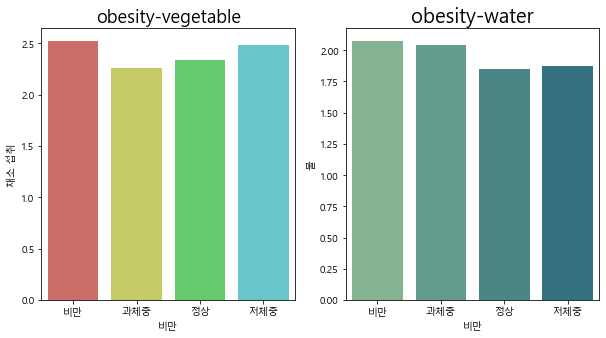

In [34]:
# 위 데이터를 차트화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.set_palette("hls")
sns.barplot(x='비만', y='채소 섭취', data=df2)
plt.title('obesity-vegetable', size=18)

plt.subplot(1, 2, 2)
sns.set_palette("crest")
sns.barplot(x='비만', y='물', data=df2)
plt.title('obesity-water', size=20)

# plt.savefig('image2.png')
plt.show()

* 비만인 사람들의 물, 채소 섭취량은 낮을 것이다 라는 가설은 성립하지 않는다.
* 또한 물, 채소 섭취량과 비만 사이의 관계는 생각보다 뚜렷하지는 않았다.

### 3. 전자기기 - 운동량 - 비만

* 전자기기 사용량 표기 => 1: 0-2시간, 4: 3-5시간, 7: 5시간 이상 

In [21]:
# 전자기기 데이터를 수정하는 함수
def el(x):
    if x == 0:
        return 1
    elif x == 1:
        return 4
    else:
        return 7

In [22]:
# 데이터 정수화
df['전자기기'] = df['전자기기'].round(0)
df

,성별,나이,키,몸무게,비만인 가족,고칼로리 섭취,채소 섭취,흡연,물,운동,전자기기,음주,이동수단,비만
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,no,2.000000,0.000000,1.0,no,Public_Transportation,정상
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,yes,3.000000,3.000000,0.0,Sometimes,Public_Transportation,정상
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,no,2.000000,2.000000,1.0,Frequently,Public_Transportation,정상
3,Male,27.000000,1.800000,87.000000,no,no,3.0,no,2.000000,2.000000,0.0,Frequently,Walking,과체중
4,Male,22.000000,1.780000,89.800000,no,no,2.0,no,2.000000,0.000000,0.0,Sometimes,Public_Transportation,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,no,1.728139,1.676269,1.0,Sometimes,Public_Transportation,비만
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,no,2.005130,1.341390,1.0,Sometimes,Public_Transportation,비만
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,no,2.054193,1.414209,1.0,Sometimes,Public_Transportation,비만
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,no,2.852339,1.139107,1.0,Sometimes,Public_Transportation,비만


In [23]:
df['전자기기'].value_counts()

0.0    952
1.0    915
2.0    244
Name: 전자기기, dtype: int64

In [24]:
# 함수를 사용한 데이터 변환 -> 계산의 편의성, 수치의 차이 명확히 하기 위함. 
df['전자기기'] = df['전자기기'].apply(el)
df.head(20)

,성별,나이,키,몸무게,비만인 가족,고칼로리 섭취,채소 섭취,흡연,물,운동,전자기기,음주,이동수단,비만
0,Female,21.0,1.62,64.0,yes,no,2.0,no,2.0,0.0,4,no,Public_Transportation,정상
1,Female,21.0,1.52,56.0,yes,no,3.0,yes,3.0,3.0,1,Sometimes,Public_Transportation,정상
2,Male,23.0,1.80,77.0,yes,no,2.0,no,2.0,2.0,4,Frequently,Public_Transportation,정상
3,Male,27.0,1.80,87.0,no,no,3.0,no,2.0,2.0,1,Frequently,Walking,과체중
4,Male,22.0,1.78,89.8,no,no,2.0,no,2.0,0.0,1,Sometimes,Public_Transportation,과체중
5,Male,29.0,1.62,53.0,no,yes,2.0,no,2.0,0.0,1,Sometimes,Automobile,정상
6,Female,23.0,1.50,55.0,yes,yes,3.0,no,2.0,1.0,1,Sometimes,Motorbike,정상
7,Male,22.0,1.64,53.0,no,no,2.0,no,2.0,3.0,1,Sometimes,Public_Transportation,정상
8,Male,24.0,1.78,64.0,yes,yes,3.0,no,2.0,1.0,4,Frequently,Public_Transportation,정상
9,Male,22.0,1.72,68.0,yes,yes,2.0,no,2.0,1.0,4,no,Public_Transportation,정상


* 운동량 표기(일주일) => 0: 안함, 1: 1-2일, 2: 3-4일, 3: 5일 이상 

In [25]:
# 편의를 위해 반올림
df['운동'] = df['운동'].round()
df

,성별,나이,키,몸무게,비만인 가족,고칼로리 섭취,채소 섭취,흡연,물,운동,전자기기,음주,이동수단,비만
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,no,2.000000,0.0,4,no,Public_Transportation,정상
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,yes,3.000000,3.0,1,Sometimes,Public_Transportation,정상
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,no,2.000000,2.0,4,Frequently,Public_Transportation,정상
3,Male,27.000000,1.800000,87.000000,no,no,3.0,no,2.000000,2.0,1,Frequently,Walking,과체중
4,Male,22.000000,1.780000,89.800000,no,no,2.0,no,2.000000,0.0,1,Sometimes,Public_Transportation,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,no,1.728139,2.0,4,Sometimes,Public_Transportation,비만
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,no,2.005130,1.0,4,Sometimes,Public_Transportation,비만
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,no,2.054193,1.0,4,Sometimes,Public_Transportation,비만
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,no,2.852339,1.0,4,Sometimes,Public_Transportation,비만


In [26]:
# 비만도를 수치화 데이터로 나타냄
df['비만도'] = (df['몸무게'] / (df['키'] * df['키'])).round(0)
df

,성별,나이,키,몸무게,비만인 가족,고칼로리 섭취,채소 섭취,흡연,물,운동,전자기기,음주,이동수단,비만,비만도
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,no,2.000000,0.0,4,no,Public_Transportation,정상,24.0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,yes,3.000000,3.0,1,Sometimes,Public_Transportation,정상,24.0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,no,2.000000,2.0,4,Frequently,Public_Transportation,정상,24.0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,no,2.000000,2.0,1,Frequently,Walking,과체중,27.0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,no,2.000000,0.0,1,Sometimes,Public_Transportation,과체중,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,no,1.728139,2.0,4,Sometimes,Public_Transportation,비만,45.0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,no,2.005130,1.0,4,Sometimes,Public_Transportation,비만,44.0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,no,2.054193,1.0,4,Sometimes,Public_Transportation,비만,44.0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,no,2.852339,1.0,4,Sometimes,Public_Transportation,비만,44.0


In [27]:
# 필요한 데이터만 따로 문리함
new_df = df[['전자기기', '운동', '비만도', '비만']]
new_df

,전자기기,운동,비만도,비만
0,4,0.0,24.0,정상
1,1,3.0,24.0,정상
2,4,2.0,24.0,정상
3,1,2.0,27.0,과체중
4,1,0.0,28.0,과체중
...,...,...,...,...
2106,4,2.0,45.0,비만
2107,4,1.0,44.0,비만
2108,4,1.0,44.0,비만
2109,4,1.0,44.0,비만


In [28]:
# 전자기기 사용 시간과 운동량의 상관관계
new_df.corr()

,전자기기,운동,비만도
전자기기,1.000000,0.055513,-0.068625
운동,0.055513,1.000000,-0.171101
비만도,-0.068625,-0.171101,1.000000


* 이 데이터에 따르면 전자기기 사용과 운동량은 전혀 관련이 없다.
* 운동과 비만도의 음의 상관관계가 운동을 많이 할수록 비만도가 낮아짐을 나타낸다.

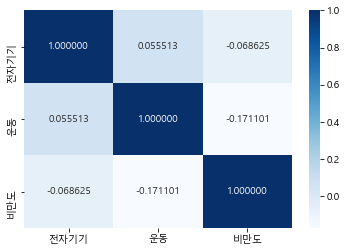

In [35]:
# 히트맵으로 나타낸 상관관계
sns.heatmap(new_df.corr(), annot=True, fmt='f', cmap='Blues')
# plt.savefig('image3.png')
plt.show()

* 전자기기 사용 시간이 길수록, 운동량이 적고, 비만일 확률이 높을 것이라는 가설은 타당하지 않았다.
* 운동량이 적으면 비만일 확률이 높을 것이다라는 것은 어느정도 성립한다고 볼 수 있다.